In [31]:
def actf(x):
    return 1.0/(1.0+np.exp(-x))

In [32]:
def actf_prime(x):
    return x*(1.0-x)

In [33]:
def actbin(x):
    x[x>=0.5] = 1
    x[x<0.5] = 0
    return x

In [34]:
inputs, hiddens, outputs = 2, 2, 1
learning_rate = 0.5

In [35]:
import numpy as np
X = np.array([[0,0], [0, 1], [1, 0], [1, 1]])
T = np.array([[0], [1], [1], [0]])

In [36]:
W1 = 2*np.random.randn(inputs, hiddens) - 1.0
W2 = 2*np.random.randn(hiddens, outputs) - 1.0
b1 = np.zeros(hiddens)
b2 = np.zeros(outputs)

In [37]:
W1, W2, b1, b2

(array([[-0.61501102, -4.03377414],
        [ 0.38411785, -2.83484789]]),
 array([[-2.65208778],
        [ 0.83535851]]),
 array([0., 0.]),
 array([0.]))

In [38]:
def predict(X, W1, W2, b1, b2):
    layer0 = X
    z1 = np.dot(layer0, W1) + b1
    layer1 = actf(z1)
    z2 = np.dot(layer1, W2) + b2
    layer2 = actf(z2)
    return layer0, layer1, layer2

In [39]:
def fit(X, W1, W2, b1, b2, T, it_max=60000):
    out = list()
    for it in range(it_max):
        layer0, layer1, layer2 = predict(X, W1, W2, b1, b2)
        layer2_error = layer2 - T
        
        out.append((layer2_error**2).mean())
        
        layer2_delta = layer2_error * actf_prime(layer2) # layer2=h_sum
        layer1_error = np.dot(layer2_delta, W2.T) # layer1=x_sum
        layer1_delta = layer1_error * actf_prime(layer1)
        
        W2 +=  -learning_rate * np.dot(layer1.T, layer2_delta)/4.0
        W1 +=  -learning_rate * np.dot(layer0.T, layer1_delta)/4.0
        b2 +=  -learning_rate * np.sum(layer2_delta, axis=0)/4.0
        b1 +=  -learning_rate * np.sum(layer1_delta, axis=0)/4.0
        
    return W1, W2, b1, b2, out

In [40]:
W1, W2, b1, b2, out = fit(X, W1, W2, b1, b2, T, 10000)

In [41]:
_,_, layer2 = predict(X, W1, W2, b1, b2)
print(actbin(layer2))

[[0.]
 [1.]
 [1.]
 [1.]]


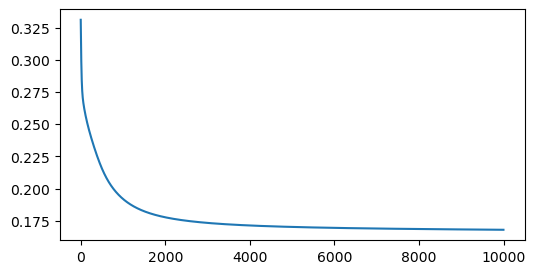

In [42]:
import matplotlib.pyplot as plt

npout = np.array(out)
plt.figure(figsize=(6,3))
plt.plot(npout)
plt.show()